<a href="https://colab.research.google.com/github/fereol023/My-ML-Courses-/blob/main/TDClusteringFormage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I- Connection à votre drive pour la lecture des données:

Cette étape est nécessaire seulement si vous travailler sous Colab. Si vous travailler avec un aure éditeur python sur votre machine, il suffit de placer le fichier "formage.txt" dans votre répertoire de travail.

1- Créer sur votre drive google un répertoire au nom "data" et importer dedans le fichier "data.txt"

2- Créer une connection à votre drive en exécutant le code suivant:

```
from google.colab import drive
drive.mount(‘/content/drive’)
```
4- Suivre les étapes de connection et copier le lien envoyé.
Si vous avez rencontrez des difficultés, vous pouvez visualiser cette vidéo: https://youtu.be/TDyfhlg23vs



# II- Importation des données "fromage.txt" dans un frame pandas : 
Le fichier « fromage.txt » provient de la page de cours de Marie Chavent de l’Université de Bordeaux.
Il contient un ensemble de fromages (29
observations) décrits par leurs propriétés nutritives (ex. protéines, lipides, etc. ; 9 variables).

 L’objectif est d’identifier des groupes de fromages homogènes, partageant des caractéristiques similaires.

Compléter le code suivant afin d’importer les données du fichier "formage.txt" et afficher les caractéristiques correspondantes.
1- Importer la librairie 'pandas'

2- Importer les données du fichier "fromage.txt"  dans un frame Pandas (copier le chemin complet à partir de votre drive)

3- Afficher les dimensions de la table avec la propriété shape 
4- Afficher les types des colonnes 
5- Afficher les 4 premières lignes du dataframe.

In [1]:
#importer  la librairie Pandas
import pandas as pd
import requests
import io

#lecture du fichier "fromage.txt" avec la fonction read_table de pandas
#header = 0, la première ligne correspond à l'entête (intitulé des champs)
url = "https://raw.githubusercontent.com/fereol023/My-ML-Courses-/main/fromage.txt"
download = requests.get(url).content
fromage = pd.read_table(io.StringIO(download.decode()),sep="\t",header=0,index_col=0)

#afficher les dimensions de la table  (fonction shape) ainsi que leur types (propriété dtype)

#afficher la liste des colonnes et leurs types avec la propriété dtype

#afficher les 4 premières lignes de la table
print(fromage.head())

             calories  sodium  calcium  lipides  retinol  folates  proteines  \
Fromages                                                                       
CarredelEst       314   353.5     72.6     26.3     51.6     30.3       21.0   
Babybel           314   238.0    209.8     25.1     63.7      6.4       22.6   
Beaufort          401   112.0    259.4     33.3     54.9      1.2       26.6   
Bleu              342   336.0    211.1     28.9     37.1     27.5       20.2   
Camembert         264   314.0    215.9     19.5    103.0     36.4       23.4   

             cholesterol  magnesium  
Fromages                             
CarredelEst           70         20  
Babybel               70         27  
Beaufort             120         41  
Bleu                  90         27  
Camembert             60         20  


# III- Statistiques et description de la base

Avant la segmentation des données, il est intéressant de comprendre la nature des variables descriptives ainsi que les corrélations entre elles.

1.   Afficher les statistiques descriptives de la table : vous pouvez utiliser la fonction `describe` de pandas (`objet.describe()`)
2.   Afficher le graphique de corrélation deux à deux des variables en utilisant la fonction `scatter_matrix` de pandas:
https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html. 

Pour ce faire, reprenez les deux lignes suivantes: 
```
from pandas.plotting import scatter_matrix
scatter_matrix(fromage,figsize=(9,9))
```




In [ ]:
#importation de la librarire

#Affichage des statistiques descriptives
fromage.describe()
#affichage du graphique de corrélation
#pd.plotting.scatter_matrix(fromage, alpha=0.2)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


# IV- Clustering des données avec la  méthode K-means

On se propose maintenant de grouper les types de fromage en utilisant la méthode de K-means. 

1.   Importer la librairie `cluster` de sklearn
2.   Créer une instance de la classe `Kmeans` avec 4 clusters
3.   Lancer l'apprentissage: la fonction `fit` pour les classes de cluster prend un seul argument: le dataframe des données à segmenter (fromage)  
4.   Enregistrer dans une variable  '`labelsKM`' les labels des clusters retournés par la fonction predict de Kmeans (`Kmeans.predict(fromage)`). Afficher la variable  '`labelsKM`'
5. Enregsitrer dans une variable '`CentresKM`' les centres des clusters définis par KMeans (`KMeans.cluster_centers_`)



[0 1 1 0 0 1 3 3 1 1 3 1 1 3 0 2 2 0 0 1 2 3 1 0 0 1 3 1 2]


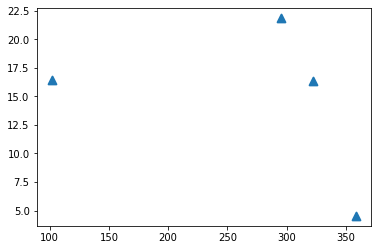

In [ ]:
#k-means sur les données des fromages
#importer les librarires cluster et pyplot (as plt)
from sklearn import cluster
import matplotlib.pyplot as plt

#création d'un cluster Kmean avec un nombre de clusters égal à 4
k_mean = cluster.KMeans(n_clusters = 4)
#Apprentissage (segmetation) (fonction fit)
k_mean_fit = k_mean.fit(fromage)
#Prédiction et enregistrement des labels 
labelsKM = k_mean.predict(fromage)
#Affichage des labels
print(labelsKM)
#enregistrement des centres des clusters
centresKM = k_mean.cluster_centers_

plt.scatter(centresKM[:,0],centresKM[:,1], s=60,marker='^',linewidth=2) # dans le plan (0,1)

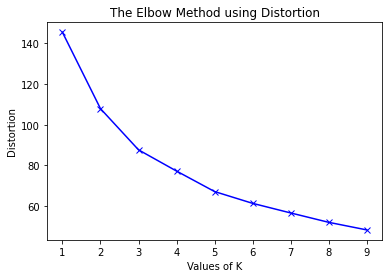

1 : 145.45030691845633
2 : 107.89801715617207
3 : 87.63925606511017
4 : 77.19286396613614
5 : 67.11913816748897
6 : 61.323538304476735
7 : 56.606470176997156
8 : 51.995719390272185
9 : 48.26565423243332


In [ ]:
# coude
import numpy as np
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = cluster.KMeans(n_clusters=k).fit(fromage)
    kmeanModel.fit(fromage)
  
    distortions.append(sum(np.min(cdist(fromage, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / fromage.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(fromage, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / fromage.shape[0]
    mapping2[k] = kmeanModel.inertia_


plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

for key, val in mapping1.items():
    print(f'{key} : {val}')

# V- Clustering  avec la méthode hiérarchique Agglomerative
Comme deuxième approche de segmentation, nous utiliserons la méthode hiérarchique agglomérative

1. Importer la librairie  `AgglomerativeClustering` dans scikit-learn.cluser : 
`from sklearn.cluster import AgglomerativeClustering`

2.  Créer une instance CHA de la classe `AgglomerativeClusterin`g avec un nombre de clusters égal à 4.
3. Appliquer la segmentation sur les données 'fromage'  comme ce qui a été fait avec Kmeans.

4. Enregistrer dans une variable 'labelsCHA' les labels des clusters retournés par la fonction `fit_predict` de CHA (CHA.fit_predict(fromage)). Afficher la variable 'labelsCHA'

##Affichage du dendrogramme
La libraririe `scipy.cluster.hierarchy`permet de générer et afficher le dendrogramme des méthodes hiérarchiques de clustering.
* Importer la bibliothèque `scipy.cluster.hierarchy` sous le nom `sch`
* générer le dendrogramme avec la ligne de code:
```
dendrogram = sch.dendrogram(sch.linkage(fromage, method='ward'))
```




[1 2 0 1 1 0 2 2 0 0 2 0 0 2 1 3 3 1 1 0 3 2 2 2 1 0 2 0 3]


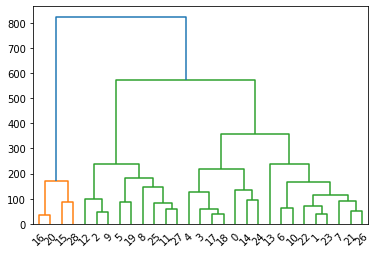

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#création d'une  CHA
CHA = AgglomerativeClustering(n_clusters=4)
#Apprentissage (segmentation)
CHA_fit = CHA.fit(fromage)
#Prédiction et enregistrement des labels (fonction fit_predict)
labelsCHA = CHA.fit_predict(fromage)
print(labelsCHA)

#Affichage du dendrogramme de la méthode hiérarchique
#importer la librarairie scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
#générer le dendrogramme des méthodes hiérarchique 
dendrogram = sch.dendrogram(sch.linkage(fromage, method='ward'))


# VI- Validation et croisement des résultats

La mesure `silhouette_score` est utilisée pour mesurer la performance des clusters.  Ce score mesure la distance entre chaque point d'un cluster et les points des clusters voisins.

**Analyse du score Silhouette**
La plage du score Silhouette est [-1, 1]. Son analyse est la suivante :

* Si le Score est proche de +1 : Score Silhouette 
indique que l'échantillon est loin de son cluster voisin.
* si le score est proche de 0 : Score Silhouette indique que l'échantillon est sur ou très près de la frontière de décision séparant deux clusters voisins. 
* si le score est proche de -1 : Score Silhouette indique que les échantillons ont été assignés aux mauvais clusters.

1. Importer la libraire `metrics` de scikit-learn
2. Calculer les scores de Silouhette des deux clusters (ex: `metrics.silhouette_score(fromage,labelskm)`)
3. Comparer les deux modèles
4. Croiser les deux listes de labels (labelskm et labelsCHA) en utilisant  la fonction crosstab définie dans la librairie pandas. Interpréter la matrice résultat.


In [ ]:
#librairie pour évaluation des partitions
from sklearn import metrics
from pandas import crosstab
silhouette_KM = metrics.silhouette_score(fromage,labelsKM)
silhouette_CHA = metrics.silhouette_score(fromage,labelsCHA)

#affichage de la fonction 
#metrics.silhouette_score()

print(silhouette_KM)
print(silhouette_CHA)

#correspondance avec les groupes de kmeans
crosstab(labelsKM, labelsCHA)

0.3369907041718868
0.31556786198229153


col_0,0,1,2,3
row_0,,,,
0,1,6,3,0
1,0,0,0,4
2,8,0,0,0
3,0,1,6,0
